READ DATA

In [1]:
import os
import shutil
import glob
import numpy as np

In [2]:
basePath = "./out/runYan_basic_singleQueries_forsecondaryPlansComparison_20230927/full/"
secPlanPath = "./out/runYan_secondaryPlans_revised_singleQueries_20230927/full/" 
jCSecPlan = "./out/runYan_joinCostsXsecondaryPlans_singleQueries_20230927/full/"
queries = ["4ag", "6an", "11ag", "30ag"]

In [3]:
def openFileByWildcard(wc):
  for filename in glob.glob(wc):
    f = open(filename, 'r')
    return f

In [4]:
def getNextLine(filelist):
  res = []
  for f in filelist:
    if f != None:
      res.append(f.readline())
    else:
      res.append("")

  return res

In [5]:
def getResultCount(s):
    return s.split(";")[1].strip()

In [6]:
def getQueryName(s):
  return s.split(";")[0].split("/")[-1].replace(".sql", "")

In [7]:
def numTuplesCheck(filelist):
    nls = getNextLine(filelist)
    res = None
    i = 0
    for nl in nls:
        #print(filelist[i].name)
        if "Timeout" in nl or not nl:
            i = i + 1
            continue
        newres = getResultCount(nl)
        if not res:
            res = newres
        else:
            if res == newres:
                print(getQueryName(nl) + " Valid")
            else:
                raise Exception(filelist[i].name + "is Invalid!")
        i = i + 1

In [8]:
def parseTimeToMS(timestring):
    if "time:" in timestring:
        timestring = timestring.replace("time:", "")
    if "Timeout" in timestring or "timeout" in timestring:
        return None#9999999999.0
    if "m" in timestring and "ms" not in timestring: # xmx.xs
        m = timestring.split("m")
        return ((float(m[0])*60) + float(m[1].split("s")[0]) ) * 1000
    elif "ms" in timestring: # xx.xms
        return float(timestring.split("ms")[0])
    elif "s" in timestring: # x.xxs
        return float(timestring.split("s")[0]) * 1000

In [9]:
def parseTimeFile(file):
    l = file.readline()
    if not l:
        return None#9999999999.0
    sp = l.split(";")
    if len(sp) != 2:
       return None#9999999999.0
    return parseTimeToMS(sp[-1])
        

In [10]:
querytimes = [] # elements: correspond with query indexes, tuples corresponding to variant (base, secplan, jcXsecplan), which consist of lists for the tries ([([1,2,3,4,5], [1,2,3,4,5], [1,2,3,4,5]), ([1,2,3,4,5], [1,2,3,4,5], [1,2,3,4,5]), ([1,2,3,4,5], [1,2,3,4,5], [1,2,3,4,5]), ([1,2,3,4,5], [1,2,3,4,5], [1,2,3,4,5])])
for q in queries:
    times1 = []
    times2 = []
    times3 = []
    for i in range(1,6):
        
        times1.append(parseTimeFile(openFileByWildcard(basePath + "/" + q + "/" + str(i) + "/*/times*")))
        nt1 = openFileByWildcard(basePath + "/" + q + "/" + str(i) + "/*/numTuples*")
        times2.append(parseTimeFile(openFileByWildcard(secPlanPath + "/" + q + "/" + str(i) + "/*/times*")))
        nt2 = openFileByWildcard(secPlanPath + "/" + q + "/" + str(i) + "/*/numTuples*")
        times3.append(parseTimeFile(openFileByWildcard(jCSecPlan + "/" + q + "/" + str(i) + "/*/times*")))
        nt3 = openFileByWildcard(jCSecPlan + "/" + q + "/" + str(i) + "/*/numTuples*")
        # compare nt files
        numTuplesCheck([nt1, nt2, nt3])
    querytimes.append(list((np.array(times1), np.array(times2), np.array(times3))))

print(querytimes)

04ag Valid
04ag Valid
04ag Valid
04ag Valid
04ag Valid
04ag Valid
04ag Valid
04ag Valid
04ag Valid
04ag Valid
06an Valid
06an Valid
06an Valid
06an Valid
06an Valid
06an Valid
06an Valid
06an Valid
06an Valid
06an Valid
11ag Valid
30ag Valid
30ag Valid
30ag Valid
30ag Valid
30ag Valid
30ag Valid
30ag Valid
30ag Valid
30ag Valid
[[array([29000., 27400., 24400., 25500., 25900.]), array([26700., 28300., 22300., 52500., 26400.]), array([50700., 51000., 25400., 24100., 28400.])], [array([1760., 2770., 1460., 3100., 2820.]), array([1650., 1150., 2930., 1320., 2730.]), array([2230., 2080., 1330., 2940., 1260.])], [array([None, None, None, None, None], dtype=object), array([None, None, None, None, 50900.0], dtype=object), array([128199.99999999999, None, None, 67700.0, 59600.0], dtype=object)], [array([483000.,  51100.,  23700.,  26400.,  29000.]), array([43600., 34200., 38600., 27800., 31600.]), array([24300.0, None, 29900.0, 64200.0, 48900.0], dtype=object)]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

[array([29000., 27400., 24400., 25500., 25900.]), array([26700., 28300., 22300., 52500., 26400.]), array([50700., 51000., 25400., 24100., 28400.])]


<Figure size 640x480 with 0 Axes>

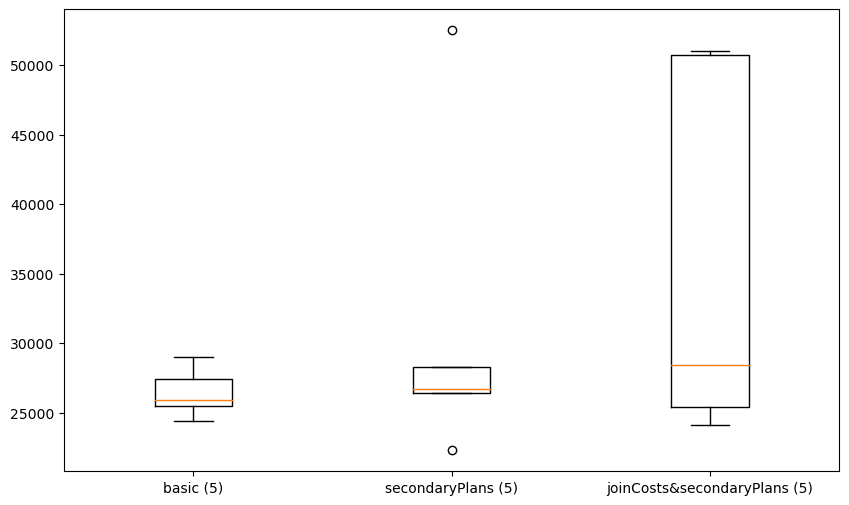

[array([1760., 2770., 1460., 3100., 2820.]), array([1650., 1150., 2930., 1320., 2730.]), array([2230., 2080., 1330., 2940., 1260.])]


<Figure size 640x480 with 0 Axes>

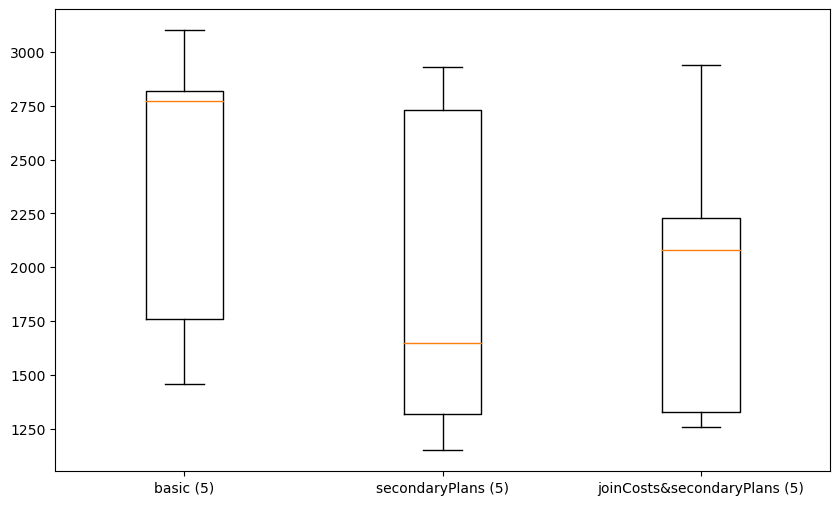

[array([], dtype=object), array([50900.0], dtype=object), array([128199.99999999999, 67700.0, 59600.0], dtype=object)]


<Figure size 640x480 with 0 Axes>

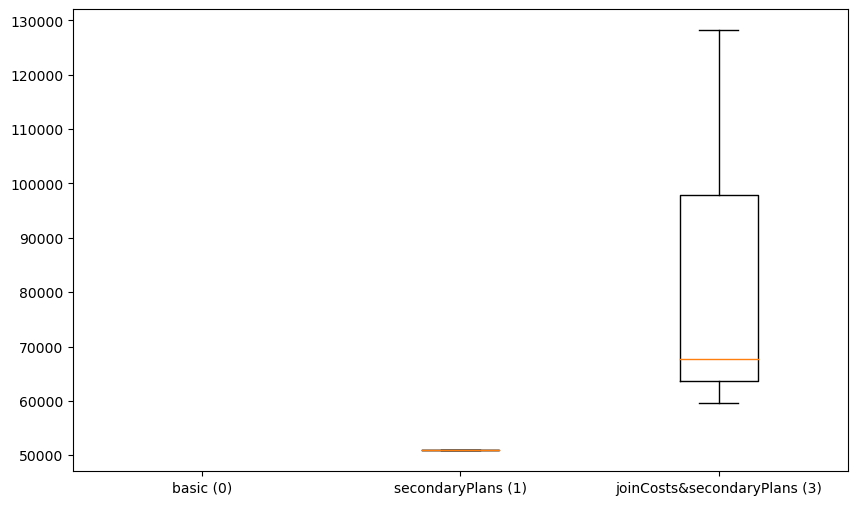

[array([483000.,  51100.,  23700.,  26400.,  29000.]), array([43600., 34200., 38600., 27800., 31600.]), array([24300.0, 29900.0, 64200.0, 48900.0], dtype=object)]


<Figure size 640x480 with 0 Axes>

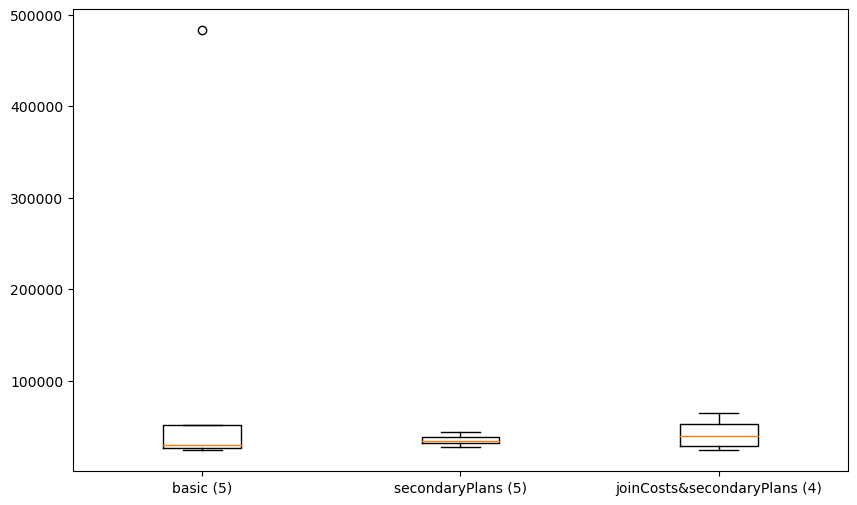

In [12]:
querytimescopy = querytimes
for q in querytimescopy:
    data = []
    for i in range(len(q)):
        q[i] = q[i][q[i] != np.array(None)]
        data.append(q[i])
    #print(q)
    print(data)
    plt.figure()
    plt.figure(figsize=(10, 6))
    box = plt.boxplot(data,
                  positions=[1, 2, 3],
                  labels=['basic (' + str(len(data[0]))+ ')', 'secondaryPlans (' + str(len(data[1]))+ ')', 'joinCosts&secondaryPlans (' + str(len(data[2]))+ ')'])
    plt.show()

In [13]:
def groupedBarChart(groupnames, valuedict, ylabel, title, widthfactor, pathToSave): # widthfactor is for moving the x labels
  x = np.arange(len(groupnames))  # the label locations
  width = 1/(len(valuedict)+1)#0.25  # the width of the bars
  multiplier = 0
  max = 0

  fig, ax = plt.subplots(layout='constrained')

  for attribute, measurement in valuedict.items():
      offset = width * multiplier
      rects = ax.bar(x + offset, measurement, width, label=attribute)
      ax.bar_label(rects, padding=len(valuedict))
      multiplier += 1
      for e in measurement:
          print(e)
          if e > max:
              max = e

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  ax.set_xticks(x + width*widthfactor, groupnames)
  ax.legend(loc='upper left', ncols=len(valuedict))
  ax.set_ylim(0, (max *1.25))

  plt.savefig(pathToSave)
  plt.show()

In [14]:
def getValue(data, i, j, alt):
    if len(data) > i:
        if len(data[i]) > j:
            return data[i][j]

    return alt

[29000. 27400. 24400. 25500. 25900.]
[26700. 28300. 22300. 52500. 26400.]
[50700. 51000. 25400. 24100. 28400.]
29000.0
26700.0
50700.0
27400.0
28300.0
51000.0
24400.0
22300.0
25400.0
25500.0
52500.0
24100.0
25900.0
26400.0
28400.0


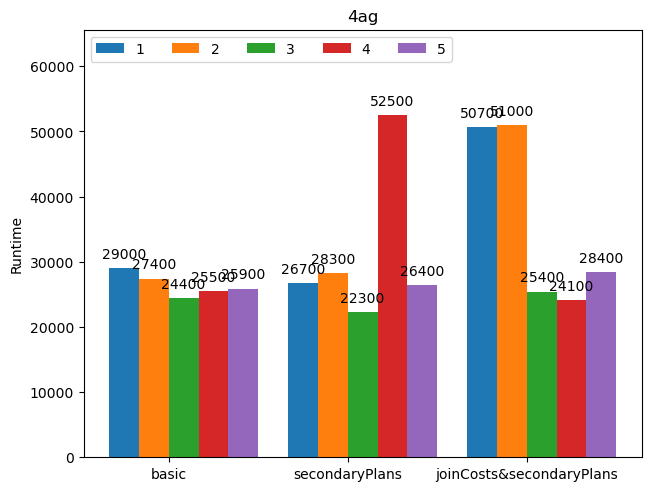

[1760. 2770. 1460. 3100. 2820.]
[1650. 1150. 2930. 1320. 2730.]
[2230. 2080. 1330. 2940. 1260.]
1760.0
1650.0
2230.0
2770.0
1150.0
2080.0
1460.0
2930.0
1330.0
3100.0
1320.0
2940.0
2820.0
2730.0
1260.0


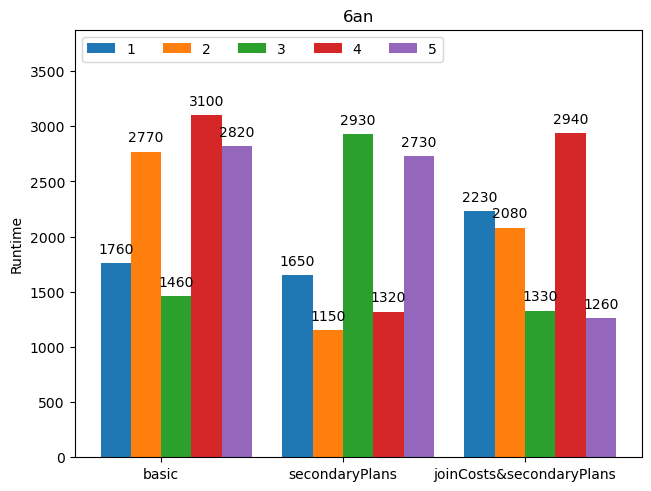

[]
[50900.0]
[128199.99999999999 67700.0 59600.0]
0
50900.0
128199.99999999999
0
0
67700.0
0
0
59600.0
0
0
0
0
0
0


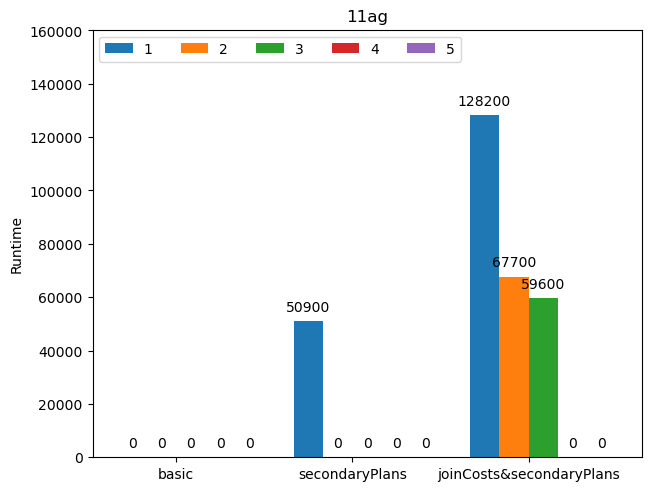

[483000.  51100.  23700.  26400.  29000.]
[43600. 34200. 38600. 27800. 31600.]
[24300.0 29900.0 64200.0 48900.0]
483000.0
43600.0
24300.0
51100.0
34200.0
29900.0
23700.0
38600.0
64200.0
26400.0
27800.0
48900.0
29000.0
31600.0
0


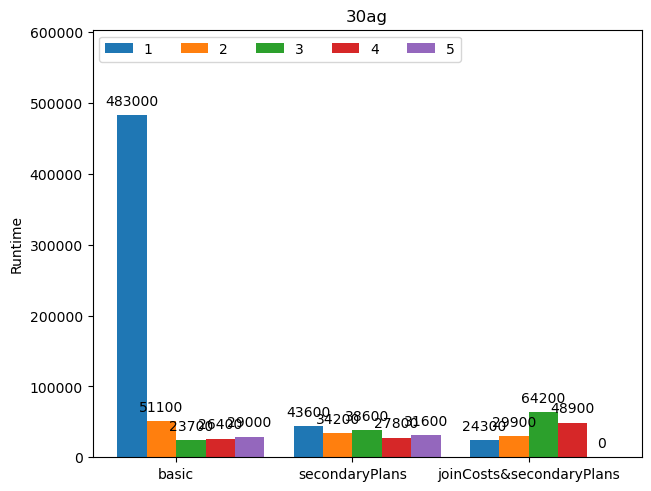

In [15]:
querytimescopy = querytimes
j = 0
for q in querytimescopy:
    data = []
    for i in range(len(q)):
        q[i][q[i] == np.array(None)] = 0
        print(q[i])
        data.append(q[i])
    groupedBarChart(("basic", "secondaryPlans", "joinCosts&secondaryPlans"), {
          '1' : (getValue(data, 0, 0, 0), getValue(data, 1, 0, 0), getValue(data, 2, 0, 0)),
          '2' : (getValue(data, 0, 1, 0), getValue(data, 1, 1, 0), getValue(data, 2, 1, 0)),
          '3' : (getValue(data, 0, 2, 0), getValue(data, 1, 2, 0), getValue(data, 2, 2, 0)),
          '4' : (getValue(data, 0, 3, 0), getValue(data, 1, 3, 0), getValue(data, 2, 3, 0)),
          '5' : (getValue(data, 0, 4, 0), getValue(data, 1, 4, 0), getValue(data, 2, 4, 0)),
      }, "Runtime", queries[j], 1.5, "./plot"+queries[j]+".png") 
    j = j + 1